In [218]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


# Exercise 1

__TODO1__ (0.25) You are being given some data that have been generated from a 2-dimensional Gaussian (see file `sample.csv`). There is a numpy function `loadtxt`that can read your sample file and convert it to a numpy array. Write some code that reads and plots the data. 

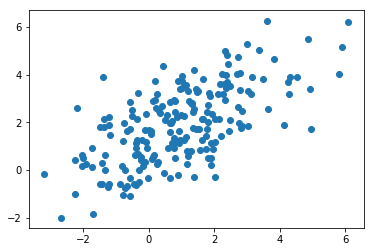

In [219]:
csv = np.loadtxt("sample.csv")
plt.scatter(csv[:,0], csv[:,1])

## Estimation of the mean

__TODO2__ (0.5 pt) First write code to estimate the mean vector and represent the mean (as a green dot) in your plot. Do not use any built-in function for the mean, but implement the formula that was given to you during the hoorcollege. 

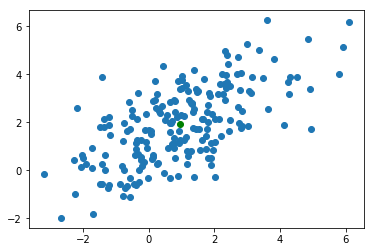

In [227]:
def means(csv):
    mean_x = 0
    mean_y = 0
    n = len(csv)
    for x,y in csv:
        mean_x += x
        mean_y += y
    mean_x = mean_x/n
    mean_y = mean_y/n
    return [mean_x, mean_y]
    
mean_list = means(csv)
plt.scatter(mean_list[0], mean_list[1], color="green")
plt.scatter(csv[:,0], csv[:,1])
plt.show()

## Estimation of the covariance matrix

__TODO3__ (0.5 pt) Next write some code returning an estimate of the covariance matrix. Again do not use any built-in function for the covariance matrix.

In [221]:
def covar_matrix(csv):
    mean_list = means(csv)
    n = len(csv)
    var_x = sum(power(csv[:,0] - mean_list[0], 2))/n
    var_y = sum(power(csv[:,1] - mean_list[1], 2))/n
    covar = dot((csv[:,0] - mean_list[0]).T, csv[:,1] - mean_list[1])/n
    cov_matrix = np.array([[var_x, covar], [covar, var_y]])
    return cov_matrix
         
print(covar_matrix(csv))

[[2.94129821 1.75211131]
 [1.75211131 2.53033368]]


__TODO4__ (0.25 pt) Now compute an estimate of the covariance matrix using the built-in function `np.cov` and compare with your previous answer. 

In [222]:
np.cov(csv[:,0], csv[:,1])

# Outcomes are nearly identical, but not exactly the same

array([[2.9560786 , 1.76091589],
       [1.76091589, 2.54304892]])

Using the estimators of the mean and covariance matrix, we have now an estimate of a Gaussian distribution $\mathcal{N}([x,y] | \mu, \Sigma)$ that we will represent on our plot. The graph of $\mathcal{N}([x,y] | \mu, \Sigma)$ is a 3-dimensional graph (one dimension for $x$, one dimension for $y$ and one dimension for $\mathcal{N}([x,y] | \mu, \Sigma)$). One way to represent such a 3-dimensional graph in 2 dimensions is to draw contour lines (in the same way that we have contour lines to represent the altitude on a geographical map). 

__TODO5__ (0.25 pt) Define a function `gaussian(x,y,mu,cova)` that takes `(x,y,mu,cova)` as parameters and returns the value of $\mathcal{N}([x,y] | \mu, \Sigma)$ at the point $(x,y)$ with mean `mu` and covariance matrix `cova`. Do not use any built-in functions for computing a multivariate Gaussian; however, tou can use the determinant and trace functions from `numpy`.

In [223]:
def gaussian(x,y,mu,cova):
    xy_list = np.array([x,y])
    top = np.exp(-0.5*((xy_list - mu).T.dot(np.linalg.inv(cova))).dot(xy_list - mu))
    bottom = (2*np.pi**len(mu)*np.linalg.det(cova))**0.5
    return top * 1/bottom

Now we will draw the contour lines. You can see some examples [here](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contour). The steps are as follows:

(1) we generate two matrices `X` and `Y` of $x$ and $y$ coordinates. 

(2) we calculate in a vector `Z` all the images $\mathcal{N}([x,y] | \mu, \Sigma)$ of the points generated in the first step. 

(3) we apply the function `plt.contour` to the vector $Z$

For step (1), first generate a vector `x0`, using the function `np.linspace`, which consists of 200 points uniformly distributed between $-8$ and $8$. Similarly, we generate `y0` and combine `x0` and `y0` using `np.meshgrid` to produce the matrices `X` and `Y`. 

In [224]:
#given to the students

x0 = np.linspace(-8, 8, 200)
y0 = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(x0, y0)

__TODO6__ (0.75 pt) In order to show your understanding of the above example, write code (similar to the previous one, except using different values as input for `np.linspace`) using the `np.linspace` and `np.meshgrid` functions that generate the below matrices `X1` and `Y1` given respectively by
$$X_1 = \begin{bmatrix} -4 & -2 & 0 & 2 & 4 \\
-4 & -2 & 0 & 2 & 4 \end{bmatrix}$$

and
$$Y_1 = \begin{bmatrix} -6 & -6 & -6 & -6 & -6 \\
6 & 6 & 6 & 6 & 6 \end{bmatrix}.$$

You can use the previous code and play around with the values $-8, 8, 200$ and $100$ and see what happens.

In [225]:
x0 = np.linspace(-4, 4, 5)
y0 = np.linspace(-6, 6, 2)
X2, Y2 = np.meshgrid(x0, y0)

print(X2)
print(Y2)

[[-4. -2.  0.  2.  4.]
 [-4. -2.  0.  2.  4.]]
[[-6. -6. -6. -6. -6.]
 [ 6.  6.  6.  6.  6.]]


__TODO7__ (0.5 pt) For steps (2) and (3), we use the functions `np.vectorize` (applied to the function $\mathcal{N}([x,y] | \mu, \Sigma)$) and the `plt.contour` function. Note that when you use the function `np.vectorize`, you will have to use the optional argument `'excluded'`, as only the first two argument of $\mathcal{N}([x,y] | \mu, \Sigma)$ are vectors.  You can now write the program that uses the matrices `X` and `Y` (as computed above) and the function created by `np.vectorize` to compute the vector `Z` and to draw the contour lines on the plot. 

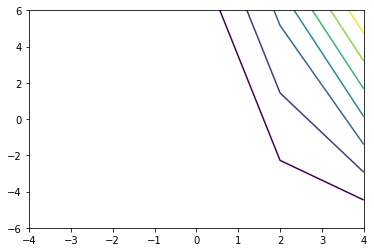

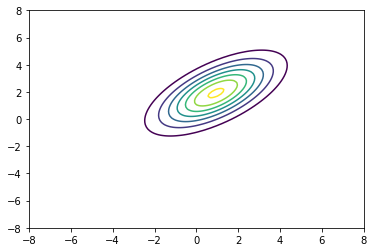

In [303]:
def calculate_Z(X,Y,csv):
    return np.array([[gaussian(X[i][j],Y[i][j],means(csv),covar_matrix(csv)) for j in range(len(X[0]))] for i in range(len(X))])

# plot with X and Y from TODO6
Z2 = calculate_Z(X2,Y2,csv)
plt.contour(X2,Y2,Z2)
plt.show()

# It looks much nicer with the given X and Y before TODO6
Z = calculate_Z(X,Y,csv)
plt.contour(X,Y,Z)
plt.show()

## Computing the eigenvalues and eigenvectors 

__TODO8__ (1 pt) Now calculate the eigenvalues and eigenvectors of the covariance matrix. Here you can use built-in functions from `numpy`. Also check that the two eigenvectors are indeed perpendicular (that is, their dot product is zero). 

In [304]:
w,v = np.linalg.eig(covar_matrix(csv))
print(w) # Eigenvalues
print(v) # Eigenvectors
print(np.dot(v[0], v[1])) # dot product of eigenvectors

[4.49993527 0.97169662]
[[ 0.74715416 -0.66465079]
 [ 0.66465079  0.74715416]]
0.0


__TODO9__ (1 pt) We now draw a graphical representation of the eigenvectors. Use the previous graph (with the data, the mean and the contour lines) and add the eigenvectors (using the mean as the origin of the vectors). Remember to use `plt.axis('square')` to scale your axes correctly.

One of the most intuitive explanations of eigenvectors of a covariance matrix is that they are the directions in which the data varies the most. Does your graphic validate this explanation?

Do the two vectors look perpendicular? Why not? 

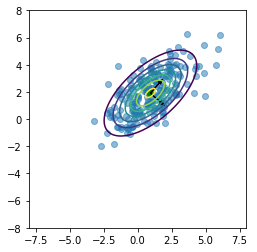

In [327]:
plt.scatter(csv[:,0], csv[:,1], alpha=0.5)
plt.scatter(mean_list[0], mean_list[1], color="green")
plt.contour(X,Y,Z)
plt.arrow(mean_list[0], mean_list[1], v[0][0], v[0][1], width=0.01, head_width=0.25, color='black')
plt.arrow(mean_list[0], mean_list[1], v[1][0], v[1][1], width=0.01, head_width=0.25, color='black')

plt.axis('square')
plt.show()

# The vectors indeed point in the direction where the data varies most
# the vectors do look perpendicular. (they would not look perpendicular if the axis weren't square)

# Exercise 2

We will now again estimate the mean, covariance matrix and eigenvectors but from a data sample that you will generate yourself from a given Gaussian distribution. 

The data from Exercise 1 were sampled from a a 2-dimensional gaussian distribution with mean
$
\begin{bmatrix}
1 \\
2
\end{bmatrix}
$
and covariance matrix $
\begin{bmatrix}
2 & 3 \\
3 & 2
\end{bmatrix}
$

__TODO10__ (2 pt) Write now a program that draws 200 samples from that same distribution and plot those samples on the plot from Exercise 1 (in a different color than the one used for the data from Exercise 1). Search for a built-in function that can generate multivariate gaussian samples. 

Using the code from Exercise 1, estimate the mean, the covariance matrix, the eigenvectors and draw the contour lines for that new sample. Do those differ much from the estimators that we found in Exercise 1?

c:\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


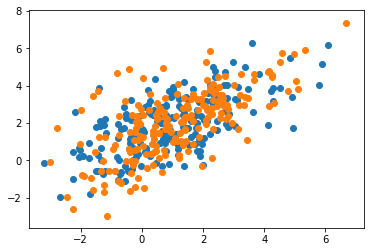

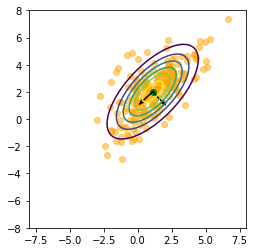

In [326]:
g_mean = np.array([1, 2])
g_cova = np.array([[2, 3], [3, 2]])
data = numpy.random.multivariate_normal(g_mean, g_cova, 200)
plt.scatter(csv[:,0], csv[:,1])
plt.scatter(data[:,0], data[:,1])
plt.show()

means2 = means(data)
cova2 = covar_matrix(data)
w2,v2 = np.linalg.eig(cova2)

plt.scatter(data[:,0], data[:,1], color="orange", alpha=0.5)
plt.scatter(means2[0], means2[1], color="green")

Z2 = calculate_Z(X,Y,data)
plt.contour(X,Y,Z2)
plt.arrow(means2[0], means2[1], v2[0][0], v2[0][1], width=0.01, head_width=0.25, color='black')
plt.arrow(means2[0], means2[1], v2[1][0], v2[1][1], width=0.01, head_width=0.25, color='black')

plt.axis('square')
plt.show()

# The plot of the new data looks very similar to the plot from the data from the CSV
# sometimes the eigenvectors can be mirrored because the data leans a little bit more to the direction the vector is pointing in

# Exercise 3

We will do the same steps (estimation of mean, covariance matrix, eigenvectors) but from a sample of data that is not necessarily generated from a Gaussian distribution. The sample can be found in the file `sample2.csv`.

__TODO11__ (3 pt) Use the code you wrote in Exercise 1 to estimate the mean, the covariance matrix, the eigenvectors, and the eigenvalues. Finally give a graphical representation of the data, the mean and the eigenvectors (as in Exercise 1).

Is this model a good fit for the data that have been given to you? Give a few words of explanation and justify why by simply looking graphically at the data, we could expect (or not) the gaussian model to be an adequate model.

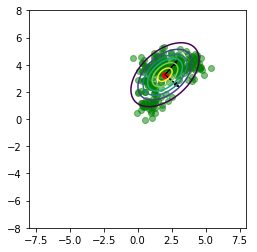

In [324]:
csv2 = np.loadtxt("sample2.csv")

means3 = means(csv2)
cova3 = covar_matrix(csv2)
w3,v3 = np.linalg.eig(cova3)

plt.scatter(csv2[:,0], csv2[:,1], color="green", alpha=0.5)
plt.scatter(means3[0], means3[1], color="red")

Z3 = calculate_Z(X,Y,csv2)
plt.contour(X,Y,Z3)
plt.arrow(means3[0], means3[1], v3[0][0], v3[0][1], width=0.01, head_width=0.25, color='black')
plt.arrow(means3[0], means3[1], v3[1][0], v3[1][1], width=0.01, head_width=0.25, color='black')

plt.axis('square')
plt.show()

# This model could be a good fit for the data we have been given because most of the data points follow the model (rings) quite well
# only some outliers to the right and bottom, so it isn't a perfect fit
# also the density isn't much denser in the middle, but rather seems to follow a horizontal and vertical line (a corner shape)